# EE16A Discussion 0D

Welcome to Google Colab! We are trying this tool for IPython notebooks during discussion sections. It's new to us too -- please be patient with any technical issues that may come up. Let us know how it works for you! The objective is to have you working **together** to edit these notebooks. 

1. When you have some time (but not necessarily right now during discussion), visit https://colab.research.google.com/ where you can learn more about Colab and poke around a bit to learn about some of its features.

2. For now, just edit this notebook together with your other group members. **You each have your own runtime, but you're editing the same underlying IPython notebook**. In order for your peers to see your edits, you need to SAVE (CTRL/CMD + s) and ask your peers to reload their version. (You have your own copies of each python variable, etc. but the underlying IPython file is shared)

3. To avoid having to reload the runtime so much, you can try this (let us know if this works better for you): have the group pick someone to "drive" and share their screen with everyone else so everyone can follow along with what their runtime is showing. 

### Graphing System of Two Equations

For the first half of Problem 1a, you were asked to solve systems of two equations. Now we will develop some graphical intuition for these problems. Each equation can be rewritten as $ax+by=c$ and thus describes a line in $\mathbb{R}^2$. Therefore, the solution to the system of equations must lie on the lines described by the system of equations (convince yourselves why this is the case).

In the next few blocks, there is code to graph two lines. Play around with the parameters $a1,b1,\ldots,c2$ to create different lines. Change the parameters to describe the system of equations from parts i-iii. For each part use the graphs to explain the results you found in Problem 1a parts i-iii.

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
# if you're in your own Jupyter notebook, you can use this for interactive plotting
# %matplotlib notebook

In [2]:
def line_xy(a,b,c):
    '''For the parameters a,b,c this function returns (x, y) pairs
    that are on the line ax+by = c'''
    b = b+.00001  # just avoiding divide-by-zero in line below
    x_range = [-100, 100]
    x = np.linspace(x_range[0],x_range[1],100)
    y = (c - a*x) / b    
    return x, y

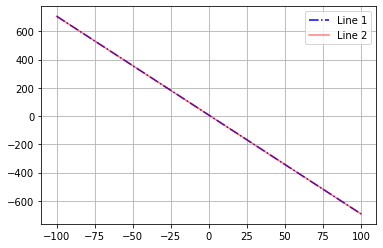

In [3]:
# use for parts i-iii
# Parameters for the first line
a1 = 49 
b1 = 7
c1 = 49

# Parameters for the second line
a2 = 42
b2 = 6
c2 = 42

x1, y1 = line_xy(a1,b1,c1)
x2, y2 = line_xy(a2,b2,c2)

fig = plt.figure()

# # let matplotlib set the axis limits
ax = fig.add_subplot(111)

# or you can change these manually to make the plot look better
# plot_xlimits = [-100, 100] 
# plot_ylimits = [-1000, 1000] 
# ax = fig.add_subplot(111, xlim=plot_xlimits, ylim=plot_ylimits)

ax.plot(x1,y1,'-.b')
ax.plot(x2,y2,'r', alpha=0.5)
ax.grid(True)
ax.legend(['Line 1','Line 2'])

You may be used to interactive plotting with matplotlib, but alas, it appears that because of the way Google hosts these notebooks for you, we can only do inline plots "out of the box" (see https://github.com/googlecolab/colabtools/issues/616)

We'll have to get a little more fancy...read on



### Graphing systems of three equations 

In [6]:
# while there are several ways to generate cool interactive plots in IPython notebooks, 
# for this we are going to use a package called Plotly which seems to mostly work in Colab. 
# You can read more about it here: https://plotly.com/python/
from plotly import graph_objects
from plotly import offline

In [7]:
def plane_xyz(a,b,c,d):
    '''For the parameters a,b,c,d this function returns matrices x_mat, y_mat, and z_mat
    that we can use to visualize a plane with the form ax+by+cz = d'''
    
    c = c+.00001  # again, avoid divide by zero
    x_range = [-10, 10]
    x = np.linspace(x_range[0],x_range[1],100)
    y = np.linspace(x_range[0],x_range[1],100)
    yt = y[:,np.newaxis]
    
    x_mat, y_mat = np.meshgrid(x, y, indexing='xy')
    z_mat = (d - a*x_mat - b*y_mat) / c
    return x_mat, y_mat, z_mat

In [8]:
# just defining to objects we'll use to format how the plot looks
axis_obj = dict(
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
    range=[-10, 10]
)
layout_obj = graph_objects.Layout(
    title='Planes in 3D',                 # set plot title
    scene=graph_objects.layout.Scene(            # (!) axes are part of a 'scene' in 3d plotly plots
        xaxis=graph_objects.layout.scene.XAxis(axis_obj),  # set x-axis style
        yaxis=graph_objects.layout.scene.YAxis(axis_obj),  # set y-axis style
        zaxis=graph_objects.layout.scene.ZAxis(axis_obj)), # set z-axis style
    showlegend=True
)

In [11]:
# Use for parts iv-vi

# Parameters for the first plane
a1 = 1
b1 = 1
c1 = 1
d1 = 4

# Parameters for the second plane
a2 = 0
b2 = 0
c2 = 3
d2 = 6

# Parameters for the third plane
a3 = 0
b3 = 1
c3 = 1
d3 = 3

# Plotting 
x1, y1, z1 = plane_xyz(a1,b1,c1,d1)
x2, y2, z2 = plane_xyz(a2,b2,c2,d2)
x3, y3, z3 = plane_xyz(a3,b3,c3,d3)

blue=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]
green=[[0, 'rgb(0,255,0)'], [1, 'rgb(0,255,0)']]
red=[[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']]


trace1 = graph_objects.Surface(x=x1, y=y1, z=z1, colorscale=blue, name='First Plane')
trace2 = graph_objects.Surface(x=x2, y=y2, z=z2, colorscale=green, name='Second Plane')
trace3 = graph_objects.Surface(x=x3, y=y3, z=z3, colorscale=red, name='Third Plane')
fig = graph_objects.Figure(data=[trace1, trace2, trace3], layout=layout_obj)
offline.iplot(fig)